# 2. basic example with PyROOT

*Please refer to a series of good pyROOT examples provided in [SWAN gallery](https://swan.web.cern.ch/content/root-primer)*

In [1]:
import ROOT
%jsroot on

Welcome to JupyROOT 6.14/09


## Read a ROOT file and fill into histogram

In [2]:
f = ROOT.TFile.Open("https://root.cern.ch/files/summer_student_tutorial_tracks.root")

Loop over events (Use PyROOT approach)

In [3]:
h = ROOT.TH1F("TracksPt","Tracks;Pt [GeV/c];#",128,0,64)
for event in f.events:
    for track in event.tracks:
        h.Fill(track.Pt())
c = ROOT.TCanvas()
h.Draw()
c.Draw()

## Write a ROOT file

### Using ROOT way

In [4]:
import ROOT
from array import array # necessary to write TTree
%jsroot on

In [5]:
f = ROOT.TFile.Open("write_test.root", "recreate")
t = ROOT.TTree("tree1", "TTree filled using ROOT way")
var = array("f", [0])
t.Branch("var1", var, "var1/F")

r = ROOT.TRandom3()
for i in range(10000):
    var[0] = r.Gaus()
    t.Fill()
t.Write()
f.Close()
print("done")

done


### Using ROOT with numpy

In [6]:
f = ROOT.TFile.Open("write_test.root", "update")
t2 = ROOT.TTree("tree2", "TTree filled using ROOT with numpy")
var = array("f", [0])
t2.Branch("var2", var, "var2/F")

import numpy as np
s = np.random.normal(0, 1, 10000) # mu=0, sigma=1
for i in range(10000):
    var[0] = s[i]
    t2.Fill()
t2.Write()
f.Close()
print("done")

done


### Using `root_numpy`

In [7]:
import numpy as np
from root_numpy import array2tree
f = ROOT.TFile.Open("write_test.root", "update")

s = np.random.normal(0, 1, 10000) # mu=0, sigma=1
s = np.array(s, dtype=[('var3', 'f')]) # specify dtype of a numpy array
t3 = array2tree(s, "tree3") # input numpy array, tree name
t3.Write()
f.Close()
print("done")

done


Check what is inside the root file?

In [8]:
f = ROOT.TFile.Open("write_test.root")
f.ls()

TFile**		write_test.root	
 TFile*		write_test.root	
  KEY: TTree	tree1;1	TTree filled using ROOT way
  KEY: TTree	tree2;1	TTree filled using ROOT with numpy
  KEY: TTree	tree3;1	tree3


### Plot the tree with ROOT approach

In [9]:
f = ROOT.TFile.Open("write_test.root")
c = ROOT.TCanvas("c", "c", 900, 300)
c.Divide(3,1)
c.cd(1); h1 = ROOT.TH1F("h1","h1",100,-3.,3.); f.Get("tree1").Draw("var1>>h1")
c.cd(2); h2 = ROOT.TH1F("h2","h2",100,-3.,3.); f.Get("tree2").Draw("var2>>h2")
c.cd(3); h3 = ROOT.TH1F("h3","h3",100,-3.,3.); f.Get("tree3").Draw("var3>>h3")
c.Draw()

### Plot the tree with python approach

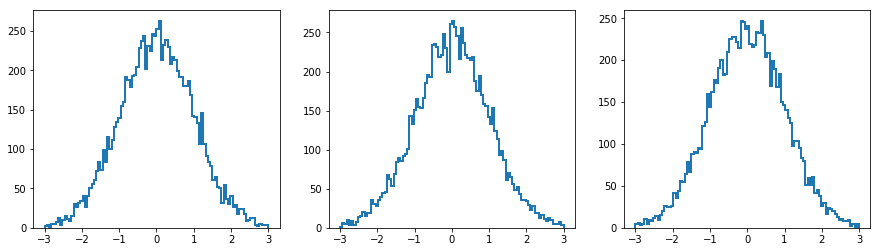

In [11]:
from root_numpy import root2array
from matplotlib import pyplot as plt
arr1 = root2array("write_test.root", "tree1")
arr2 = root2array("write_test.root", "tree2")
arr3 = root2array("write_test.root", "tree3")

kwargs = {'bins':100, 'range':(-3.,3.), 'histtype':'step', 'linewidth':2}
plt.figure(figsize=(15,4))
plt.subplot(1,3,1); plt.hist(arr1["var1"], **kwargs)
plt.subplot(1,3,2); plt.hist(arr2["var2"], **kwargs)
plt.subplot(1,3,3); plt.hist(arr3["var3"], **kwargs)
plt.show()